# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Load Data

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [3]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [4]:
data[data['language']=='English']

,Text,language
37,in johnson was awarded an american institute ...,English
40,bussy-saint-georges has built its identity on ...,English
76,minnesotas state parks are spread across the s...,English
90,nordahl road is a station served by north coun...,English
97,a talk by takis fotopoulos about the internati...,English
...,...,...
21829,on march empty mirrors press published epste...,English
21879,he [musk] wants to go to mars to back up human...,English
21896,overall the male is black above and white belo...,English
21897,tim reynolds born december in wiesbaden germ...,English


In [5]:
data['Text'][0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

# Data Preprocessing

In [6]:
stem = PorterStemmer()
stopword = stopwords.words()

for i in range(len(data)):
    line = re.sub("^[a-zA-Z]",' ',data['Text'][i]);
    line = line.lower()
    line = line.split()
    line = [stem.stem(i) for i in line if(i not in stopword)]
    line = ' '.join(line)
    data['Text'][i]=line
    
data.head()

,Text,language
0,lement gottwaldi surnukeha palsameer ning paig...,Estonian
1,ebe joseph pereira thoma eng jesuit sino-russi...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,spon behoort geslacht haliclona behoort famili...,Dutch


In [7]:
data.duplicated().sum()

146

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
data['language'].value_counts()

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Turkish        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        991
Hindi          990
French         990
Tamil          981
Indonesian     972
Latin          953
Name: language, dtype: int64

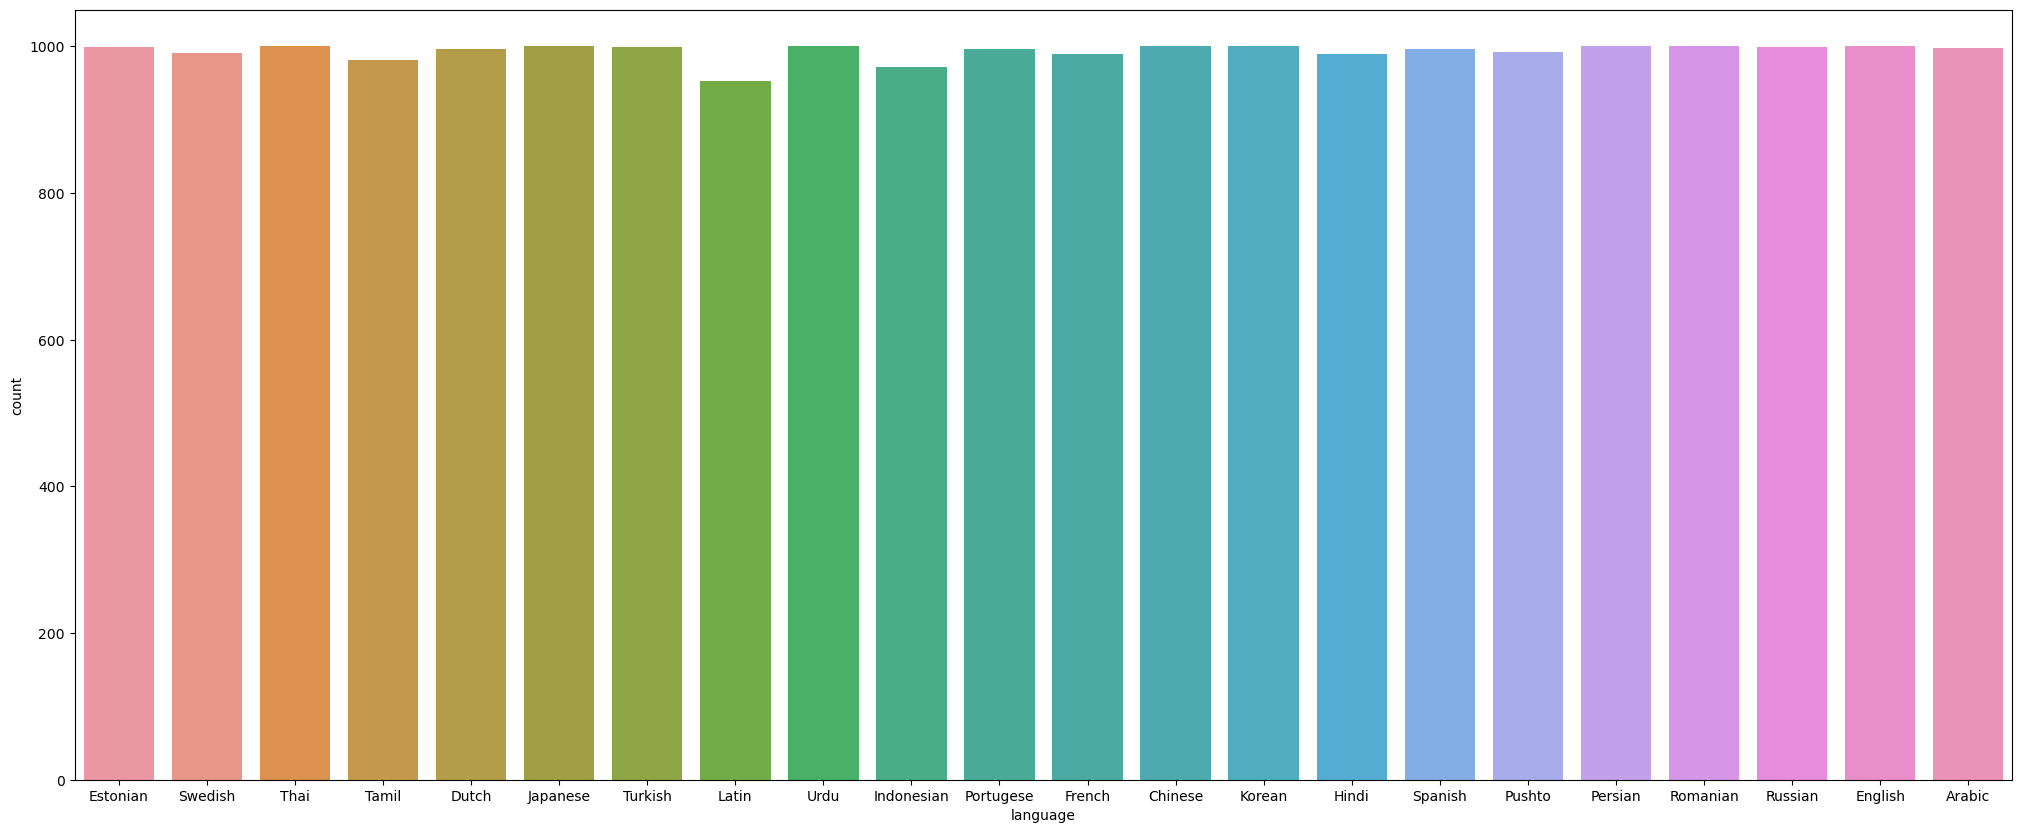

In [10]:
plt.figure(figsize=(25,10))
sns.countplot(x = data['language'],data = data)
plt.show()

In [11]:
corpus=[]
for i in data['Text']:
    corpus.append(i)
corpus

['lement gottwaldi surnukeha palsameer ning paigutati mausoleumi surnukeha aga liiga hilja oskamatult palsameeritud ning hakka ilmutama lagunemis tundemärk aastal viidi surnukeha mausoleumist ära kremeer zlíni linn kandi aastatel – nime gottwaldov ukraina harkivi oblasti kandi zmiivi linn aastatel – nime gotvald',
 'ebe joseph pereira thoma eng jesuit sino-russian treati nerchinsk diari thoma pereira bibliotheca instituti historici -- rome libri',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" எனும் தலைப்பில் பிற மாநிலங்களில் தமிழ்வளர்ச்சி பற்றி கட்டு

# Using Count-Vectorizer

In [12]:
countvectorize = CountVectorizer(max_features = 10000)
x = countvectorize.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
x.shape

(21854, 10000)

In [14]:
x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
x[0].sum()

12

In [16]:
x[1].sum()

6

### Label Encoding (converting y into categories)

In [17]:
label = LabelEncoder()
y = label.fit_transform(data['language'])
y

array([ 4, 17, 19, ..., 16,  1, 14])

In [18]:
y.shape

(21854,)

### Splitting the dataset

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17483, 10000), (4371, 10000), (17483,), (4371,))

### MultinomialNB

In [20]:
classifier = MultinomialNB().fit(x_train,y_train)
classifier

MultinomialNB()

In [21]:
pred = classifier.predict(x_test)
accuracy = (metrics.accuracy_score(y_test, pred))*100
print('The MultinomialNB count Vectorizer has:',accuracy,'% accuracy')

The MultinomialNB count Vectorizer has: 91.2605811027225 % accuracy


## -------------------------------------------------------------------------

# Using TF-IDF Vectorizer

### Splitting the dataset

In [22]:
x = data.iloc[:,0]
y = data.iloc[:,1]
x.head()

0    lement gottwaldi surnukeha palsameer ning paig...
1    ebe joseph pereira thoma eng jesuit sino-russi...
2    ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3    விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4    spon behoort geslacht haliclona behoort famili...
Name: Text, dtype: object

In [23]:
y.head()

0    Estonian
1     Swedish
2        Thai
3       Tamil
4       Dutch
Name: language, dtype: object

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Applying TF-IDF Vectorizer

In [25]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
vectorizer

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

`ngram_range=(1,3)`: This parameter specifies the range of n-grams to generate. In this case, it generates unigrams, bigrams, and trigrams (1 to 3-grams).<br>
`analyzer='char'`: This parameter specifies that character n-grams will be used. This means that instead of analyzing words, it will analyze sequences of characters.

### Logistic Regression

In [26]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

pipe_lr.fit(x_train, y_train)

C:\Users\Suprit Naik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

In [27]:
lr_predicted = pipe_lr.predict(x_test)
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 97.75795012582932 % accuracy


In [28]:
pipe_lr.predict(["привет, как дела, ты в порядке?"])

array(['Russian'], dtype=object)

### MultinomialNB

In [29]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('mnb_clf', MultinomialNB())
])

pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('mnb_clf', MultinomialNB())])

In [30]:
mnb_predicted = pipe_mnb.predict(x_test)
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has:',mnb_acc,'% accuracy')

The MultinomialNB has: 97.52916952642417 % accuracy


In [31]:
pipe_mnb.predict(["hola, cómo estás"])

array(['Spanish'], dtype='<U10')

# MODEL

### THROUGH LOGISTIC REGRESSION

In [46]:
text = input("Input Text : ")
pipe_lr.predict([text])

Input Text : வாழ்க்கை என்பது சவால்கள் மற்றும் வாய்ப்புகள் நிறைந்த ஒரு பயணம், சில நேரங்களில், நாம் அனைவரும் முன்னோக்கிச் செல்ல ஒரு சிறிய உத்வேகம் மற்றும் உந்துதல் தேவை.


array(['Tamil'], dtype=object)

### MULTINOMIALNB

In [47]:
text = input("Input Text : ")
pipe_mnb.predict([text])

Input Text : Quincy Promes gearresteerd in Dubai, Nederland om uitlevering aan te vragen. Wilders geeft de hoop van de premier op onder de deal om een einde te maken aan de impasse.


array(['Dutch'], dtype='<U10')